tb - The goal is to rigorously compare the differint Python package to Sara Shamekh's functions to calculate fractional derivatives. We will compare the results, accuracy, and calculation time.

# Imports

In [2]:
import differint.differint as df
from Sara_Shamekh_fractionals import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from math import gamma
from time import time

In [3]:
fz = 15
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw

## Test on very simple function following the differint paper

### sqrt(x)

In [4]:
Npoints = 250

In [5]:
domain = np.linspace(0.010,1,Npoints)

In [6]:
sqrt = np.sqrt(domain)

In [7]:
order = 0.5

In [8]:
df.RL

<function differint.differint.RL(alpha, f_name, domain_start=0.0, domain_end=1.0, num_points=100)>

In [9]:
t0 = time()
d_0p5_sqrt_RL = df.RL(order,sqrt,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
t1 = time()
print('df RL='+str((t1-t0))+'s')

df RL=0.09209871292114258s


In [10]:
t0 = time()
d_0p5_sqrt_GL = df.GL(order,sqrt,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
t1 = time()
print('df GLI='+str((t1-t0))+'s')

df GLI=0.0047528743743896484s


In [11]:
t0 = time()
d_0p5_sqrt_GLI = df.GLI(order,sqrt,num_points=Npoints,domain_start=float(domain[0]),domain_end=float(domain[-1]))
t1 = time()
print('df GLI='+str((t1-t0))+'s')

df GLI=0.01809096336364746s


In [12]:
if order>=0:
    t0 = time()
    d_0p5_sqrt_SS_RL_left = RL_left_integral(np.expand_dims(sqrt,0),domain[1]-domain[0],order)
    t1 = time()

    print('SS RL='+str((t1-t0))+'s')

SS RL=0.22477412223815918s


In [13]:
t0 = time()
d_0p5_sqrt_SS_RL_right = RL_right_integral(np.expand_dims(sqrt,0),domain[1]-domain[0],0.5)
t1 = time()

print('SS RL='+str((t1-t0))+'s')

SS RL=0.2221362590789795s


In [14]:
d_0p5_sqrt_SS_GL_left = np.zeros(Npoints,)

t0 = time()
for i in range(Npoints):
    d_0p5_sqrt_SS_GL_left[i] = GL_left(np.expand_dims(sqrt[i:],0),domain[1]-domain[0],0.5)
t1 = time()
print('SS RL='+str((t1-t0))+'s')

SS RL=1.7680559158325195s


In [15]:
d_0p5_sqrt_SS_GL_right = np.zeros(Npoints,)

t0 = time()
for i in range(Npoints):
    d_0p5_sqrt_SS_GL_right[i] = GL_right(np.expand_dims(sqrt[:i],0),domain[1]-domain[0],0.5)
t1 = time()
print('SS RL='+str((t1-t0))+'s')

SS RL=1.753380298614502s


In [16]:
if order==0.5: solution = gamma(1.5)*(domain**0)
elif order==-1: solution = (domain**1.5)/1.5
elif order==-1.5: solution = gamma(1.5)/gamma(3)*(domain**2)
elif order==-2: solution = (domain**2.5)/(2.5*1.5)
elif order==1: solution = 0.5*(domain**(-0.5))
elif order==2: solution = 0.5*(-0.5)*(domain**(-1.5))
elif order==0: soluation = sqrt

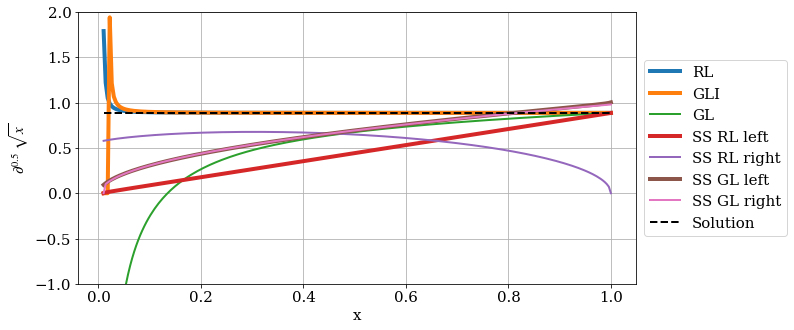

In [19]:
plt.figure(figsize=(10,5))

plt.plot(domain,d_0p5_sqrt_RL,label='RL')
plt.plot(domain,d_0p5_sqrt_GLI,label='GLI')
plt.plot(domain,d_0p5_sqrt_GL,label='GL',linewidth=0.5*lw)
if order>=0:
    plt.plot(domain,d_0p5_sqrt_SS_RL_left[0,:],label='SS RL left')
plt.plot(domain,d_0p5_sqrt_SS_RL_right[0,:],label='SS RL right',linewidth=0.5*lw)
plt.plot(domain,d_0p5_sqrt_SS_GL_left,label='SS GL left')
plt.plot(domain,d_0p5_sqrt_SS_GL_right,label='SS GL right',linewidth=0.5*lw)
plt.plot(domain,solution,linewidth=lw/2,linestyle='--',color='k',label='Solution')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim((np.min(solution[1:])-1,1+np.max(solution[1:])))
plt.ylim((-1,2))

plt.xlabel('x')
if order!=0: plt.ylabel(r'$\partial^{'+str(order)+'}\ \sqrt{x}$')
else: plt.ylabel(r'$\partial^{'+str(0)+'}\ \sqrt{x}$')